In [1]:
import pandas as pd

# Importando os dados
df = pd.DataFrame(pd.read_pickle('x_scaled.pickle'))

# Visualizando a estrutura
print(df.shape)
print(df.head())


(3100, 17)
         0         1    2    3    4    5    6    7    8    9    10   11   12  \
0  0.833333  0.019103  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.666667  0.126231  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.666667  0.178560  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.500000  0.344442  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
4  0.333333  0.008637  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    13   14   15   16  
0  0.0  0.0  1.0  0.0  
1  0.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  


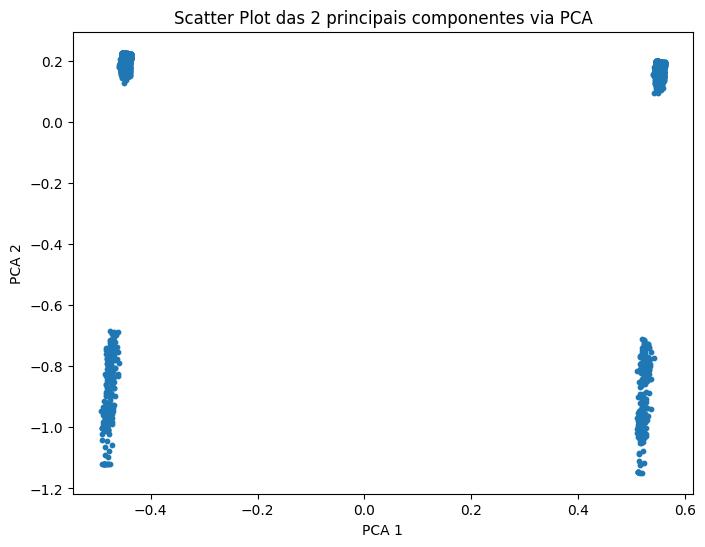

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzindo para 2 dimensões
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=10)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Scatter Plot das 2 principais componentes via PCA')
plt.show()


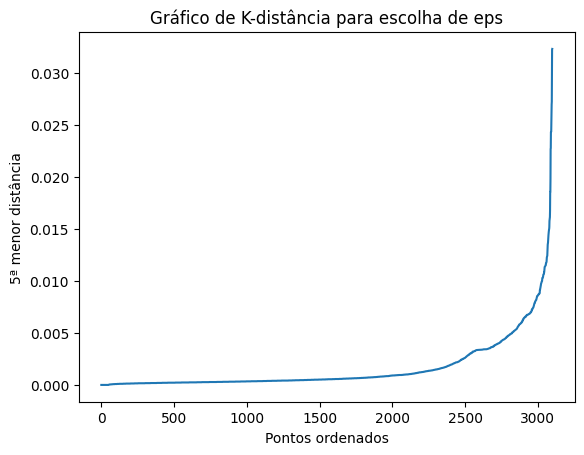

In [3]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(pca_result)
distances, indices = nbrs.kneighbors(pca_result)

# Ordenar as distâncias
distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.xlabel('Pontos ordenados')
plt.ylabel('5ª menor distância')
plt.title('Gráfico de K-distância para escolha de eps')
plt.show()


In [4]:
from sklearn.cluster import DBSCAN

# Definir eps e min_samples com base na análise anterior
eps = 0.5  # Exemplo, ajustar conforme gráfico
min_samples = 5  # Recomendado: >= dimensionalidade + 1

db = DBSCAN(eps=eps, min_samples=min_samples).fit(pca_result)

# Identificando os rótulos
labels = db.labels_

# Número de clusters (excluindo outliers que são rotulados como -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f'Número de clusters: {n_clusters}')
print(f'Número de outliers detectados: {n_noise}')


Número de clusters: 4
Número de outliers detectados: 0


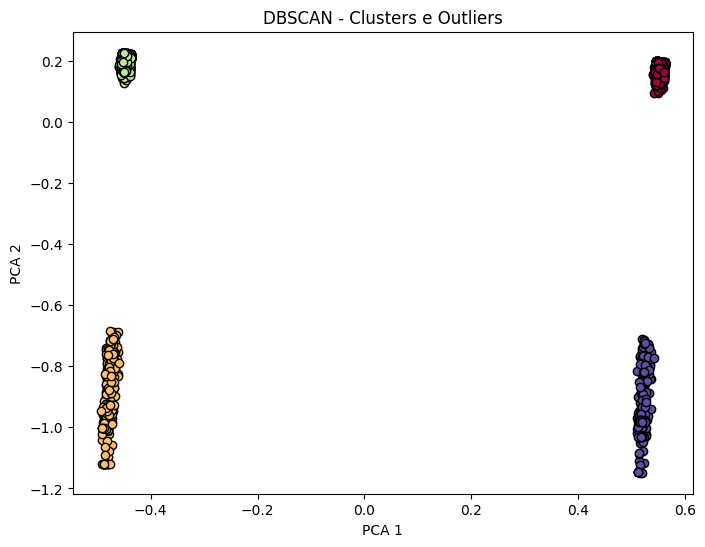

In [5]:
plt.figure(figsize=(8,6))
unique_labels = set(labels)

# Cores para os clusters
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Cor preta para outliers
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca_result[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN - Clusters e Outliers')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()
